<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [ ]:
!pip install -q ydata-profiling #q для сокращения вывода


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

#это нам для pipeline
import pickle
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

random.seed(42)
np.random.seed(42)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.8 MB/s eta 0:00:00


Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Для получения одинаковых результатов (воспроизводимость). Так инициализируются, например, "случайные" веса, распределение данных по train/test.Сиды для некоторых библиотек существуют независимо, поэтому указываем для всех используемых отдельно. Число 42 - традиция, отсылка на Автостопом по Галактике

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [ ]:
print(df_train.sample(30)) #случайные строки из train.

                                        name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   
132          Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000   
6974  Fiat Grande Punto 1.3 Dynamic (Die

In [ ]:
print(df_test.head()) #5 первых строк из test

                                     name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 b

In [ ]:
print(df_test.tail()) #5 последних

                                 name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995  

In [ ]:
missing_total_train = df_train.isnull().sum() #подсчитываем пропуски по столбцам в train
missing_columns_train = missing_total_train[missing_total_train > 0] #в каких столбцах в целом есть пропуски и сколько
print(f"Столбцы с пропусками в train: {np.array(missing_columns_train.keys())}") #np.array просто для красивого вывода

missing_total_test  = df_test.isnull().sum() #подсчитываем пропуски по столбцам в test
missing_columns_test = missing_total_test[missing_total_test > 0]
print(f"Столбцы с пропусками в test: {np.array(missing_columns_test.keys())}") #столбцы с пропусками совпадают

Столбцы с пропусками в train: ['mileage' 'engine' 'max_power' 'torque' 'seats']
Столбцы с пропусками в test: ['mileage' 'engine' 'max_power' 'torque' 'seats']


In [ ]:
exact_duplicates_train = df_train.duplicated().sum()
print(f"Число явных дубликатов в train: {exact_duplicates_train}")    #дубликатов очень много

exact_duplicates_test = df_test.duplicated().sum()
print(f"Число явных дубликатов в test: {exact_duplicates_test}")

duplicate_indices = df_train[df_train.duplicated()].index
print(df_train.loc[duplicate_indices[:10]])  # Покажем первые 10 дубликатов

Число явных дубликатов в train: 985
Число явных дубликатов в test: 62
                                         name  year  selling_price  km_driven  \
254                  Hyundai Grand i10 Sportz  2017         450000      35000   
258                          Maruti Swift VXI  2012         330000      50000   
324  Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000       9000   
325                             Lexus ES 300h  2019        5150000      20000   
326            Jaguar XF 2.0 Diesel Portfolio  2017        3200000      45000   
338           Skoda Rapid 1.6 MPI AT Elegance  2016         645000      11000   
357  Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000       9000   
358                             Lexus ES 300h  2019        5150000      20000   
359            Jaguar XF 2.0 Diesel Portfolio  2017        3200000      45000   
360                     Tata Safari Storme EX  2015         503000     110000   

       fuel seller_type transmission  

**Вопросы и ответы**

1.

 По случайным/первым/последним строкам можно сказать, что признаки есть и числовые, и категориальные. Также вероятно, что признак "name" надо проверять на значимость (и возможно удалять его), так как он не структурирован. Или при обработке, как вариант, можно оставить первое слово - марку как категориальный признак (может пригодиться например для оценки стоимости). Другие признаки надо дополнительно проверять на структурированность, нельзя судить по случайным.

Аналогично, видно, что надо приводить к общей структуре признак "torque" или удалять, так как если разводить его по категориям неоправдано (там на самом деле содержится нормальный числовой признак - число оборотов и момент)

Наиболее очевидные задачи, которые с такими данными можно решать - регрессия на определение цены/пробега или классификация по трансмиссии, числу владельцев и тд.

По тестовым данных видно главное - структура данных совпадает с тренировочными данными и это замечательно.

Все идеи по обработке данных (что удалить, что изменить и т.д.) надо проверять: есть ли корреляция цены с маркой, цены с числом оборотов и т.д. или надо эти признаки удалять. Выводы надо делать по результатам эксперимента, так как даже по случайным строкам нельзя "на глаз" сделать выводы о распределениях величин. Также нельзя ничего сказать об аномалиях, корреляции признаков (кроме очевидного повтора пробега в разных единицах)

По первым/последним в отсутствие сортировок можно только добавить, что

2.

Метод duplicated видит только точные совпадения. Даже по случайным элементам видно, что пропустил одинаковые строки с разными регистрами (например в колонке "torque"). Также может быть разным формат данных (например, в name). Так что сначала надо привести к общему виду данные. И далее, как вариант, проверить частичные совпадения и вручную сделать вывод о совпадении (на случай, если приведение к общему виду невозможно)

In [ ]:
profile = ProfileReport(
    df_train,
    title="train",
    explorative=True, #разумеется, нужен максимум информации. Датасет небольшой, поэтому можно себе позволить
)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 14.02it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [ ]:
for column in missing_columns_train.keys():
  try:
      train_median = df_train[column].median()
  except TypeError:
      train_median = df_train[column].mode()[0] #это для категориальных признаков

  df_train[column] = df_train[column].fillna(train_median)
  df_test[column] = df_test[column].fillna(train_median) # заполняем в тех же столбцах, потому что в данном датасете столбцы с пропусками совпдают.
  # если бы не совпали, то проход был по объединению списков столбцов train и test: all_missing_columns = set(missing_columns_train) | set(missing_columns_test)


#проверка пропусков
if df_train.isnull().sum().sum() + df_test.isnull().sum().sum() == 0:
  print("пропусков нет")
else:
  print("пропуски остались")

пропусков нет


### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [ ]:
target_column = "selling_price"
feature_columns = [col for col in df_train.columns if col != target_column] # все остальные
duplicates_mask = df_train.duplicated(subset = feature_columns, keep = False) # ищем дубликаты
duplicate_groups = df_train[duplicates_mask]
print("Дубликатов: ", duplicates_mask.sum())

Дубликатов:  1799


In [ ]:
groups = list(duplicate_groups.groupby(feature_columns)) #посмотрим пример в виде самой группы дубликатов
largest_group = max(groups, key=lambda x: len(x[1]))
print(largest_group[1].head(5))

                              name  year  selling_price  km_driven    fuel  \
337  Honda Amaze V CVT Petrol BSIV  2019         779000       7032  Petrol   
372  Honda Amaze V CVT Petrol BSIV  2019         779000       7032  Petrol   
577  Honda Amaze V CVT Petrol BSIV  2019         779000       7032  Petrol   
940  Honda Amaze V CVT Petrol BSIV  2019         779000       7032  Petrol   
974  Honda Amaze V CVT Petrol BSIV  2019         779000       7032  Petrol   

          seller_type transmission        owner    mileage   engine  \
337  Trustmark Dealer    Automatic  First Owner  19.0 kmpl  1199 CC   
372  Trustmark Dealer    Automatic  First Owner  19.0 kmpl  1199 CC   
577  Trustmark Dealer    Automatic  First Owner  19.0 kmpl  1199 CC   
940  Trustmark Dealer    Automatic  First Owner  19.0 kmpl  1199 CC   
974  Trustmark Dealer    Automatic  First Owner  19.0 kmpl  1199 CC   

     max_power          torque  seats  
337  88.76 bhp  110Nm@ 4800rpm    5.0  
372  88.76 bhp  110Nm@ 4

In [ ]:
df_train = df_train.drop_duplicates(subset=feature_columns, keep='first') #чистим
df_train = df_train.reset_index(drop=True)
#test не обрабатывается видимо потому что он нам "недоступен"

In [ ]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [ ]:
for df in [df_train, df_test]:
    # убираем единицы измерения и преобразуем в float,
    columns_to_clean = ['mileage', 'engine', 'max_power']

    for column in columns_to_clean:
        df[column] = df[column].astype(str).replace(r'[^\d\.]+', '', regex=True) #заменяем все что не цифра или точка
        df[column] = pd.to_numeric(df[column]).astype('float64') #пишем явно float64 потому что to_numeric может привести к int
        #обработка пропусков, которые могут всплыть после удаления единиц размерности
        median = df[column].median()
        df[column] = df[column].fillna(median) #здесь так можем себе позволить потому что в test нет таких пропусков


    df.drop('torque', axis=1, inplace=True)



### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [ ]:
df_train["engine"] = df_train["engine"].astype('int')
df_test["engine"] = df_test["engine"].astype('int')

df_train["seats"] = df_train["seats"].astype('int')
df_test["seats"] = df_test["seats"].astype('int')

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [ ]:
# Числовые статистики
print("train:")
print(df_train.describe())
print("\ntest:")
print(df_test.describe())

# Категориальные статистики
categorical_cols = df_train.select_dtypes(include=['object']).columns
print("train:")
print(df_train[categorical_cols].describe())
print("\ntest:")
print(df_test[categorical_cols].describe())

train:
              year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.415872  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.987056   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.100000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.660063     5.426712  
std      31.717041     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.800000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.00

In [ ]:
assert df_train.shape == (5840, 12)

(Статистики до пропусков можно увидеть в profile report, но там еще дубликаты оставались). Поэтому из хода заданий проверить совпадение стастистик с пропусками но без дубликатов просто так уже не получится. Единственное, что можно сказать - заполнение пропусков не сильно меняет статистику, потому что во-первых по изначальному профилю видно, что пропусков было менее 3 процентов на категорию, а во-вторых так как распределение train/test очень близкие (то есть заполнение пропусков в test по train не сильно поменяло статистику).
Видно также, что есть сильное преобладание Individual, Manual  в категориальных признаках

Общий вывод: данные согласованы между train/test (если судить только по тем данным, что есть)


## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

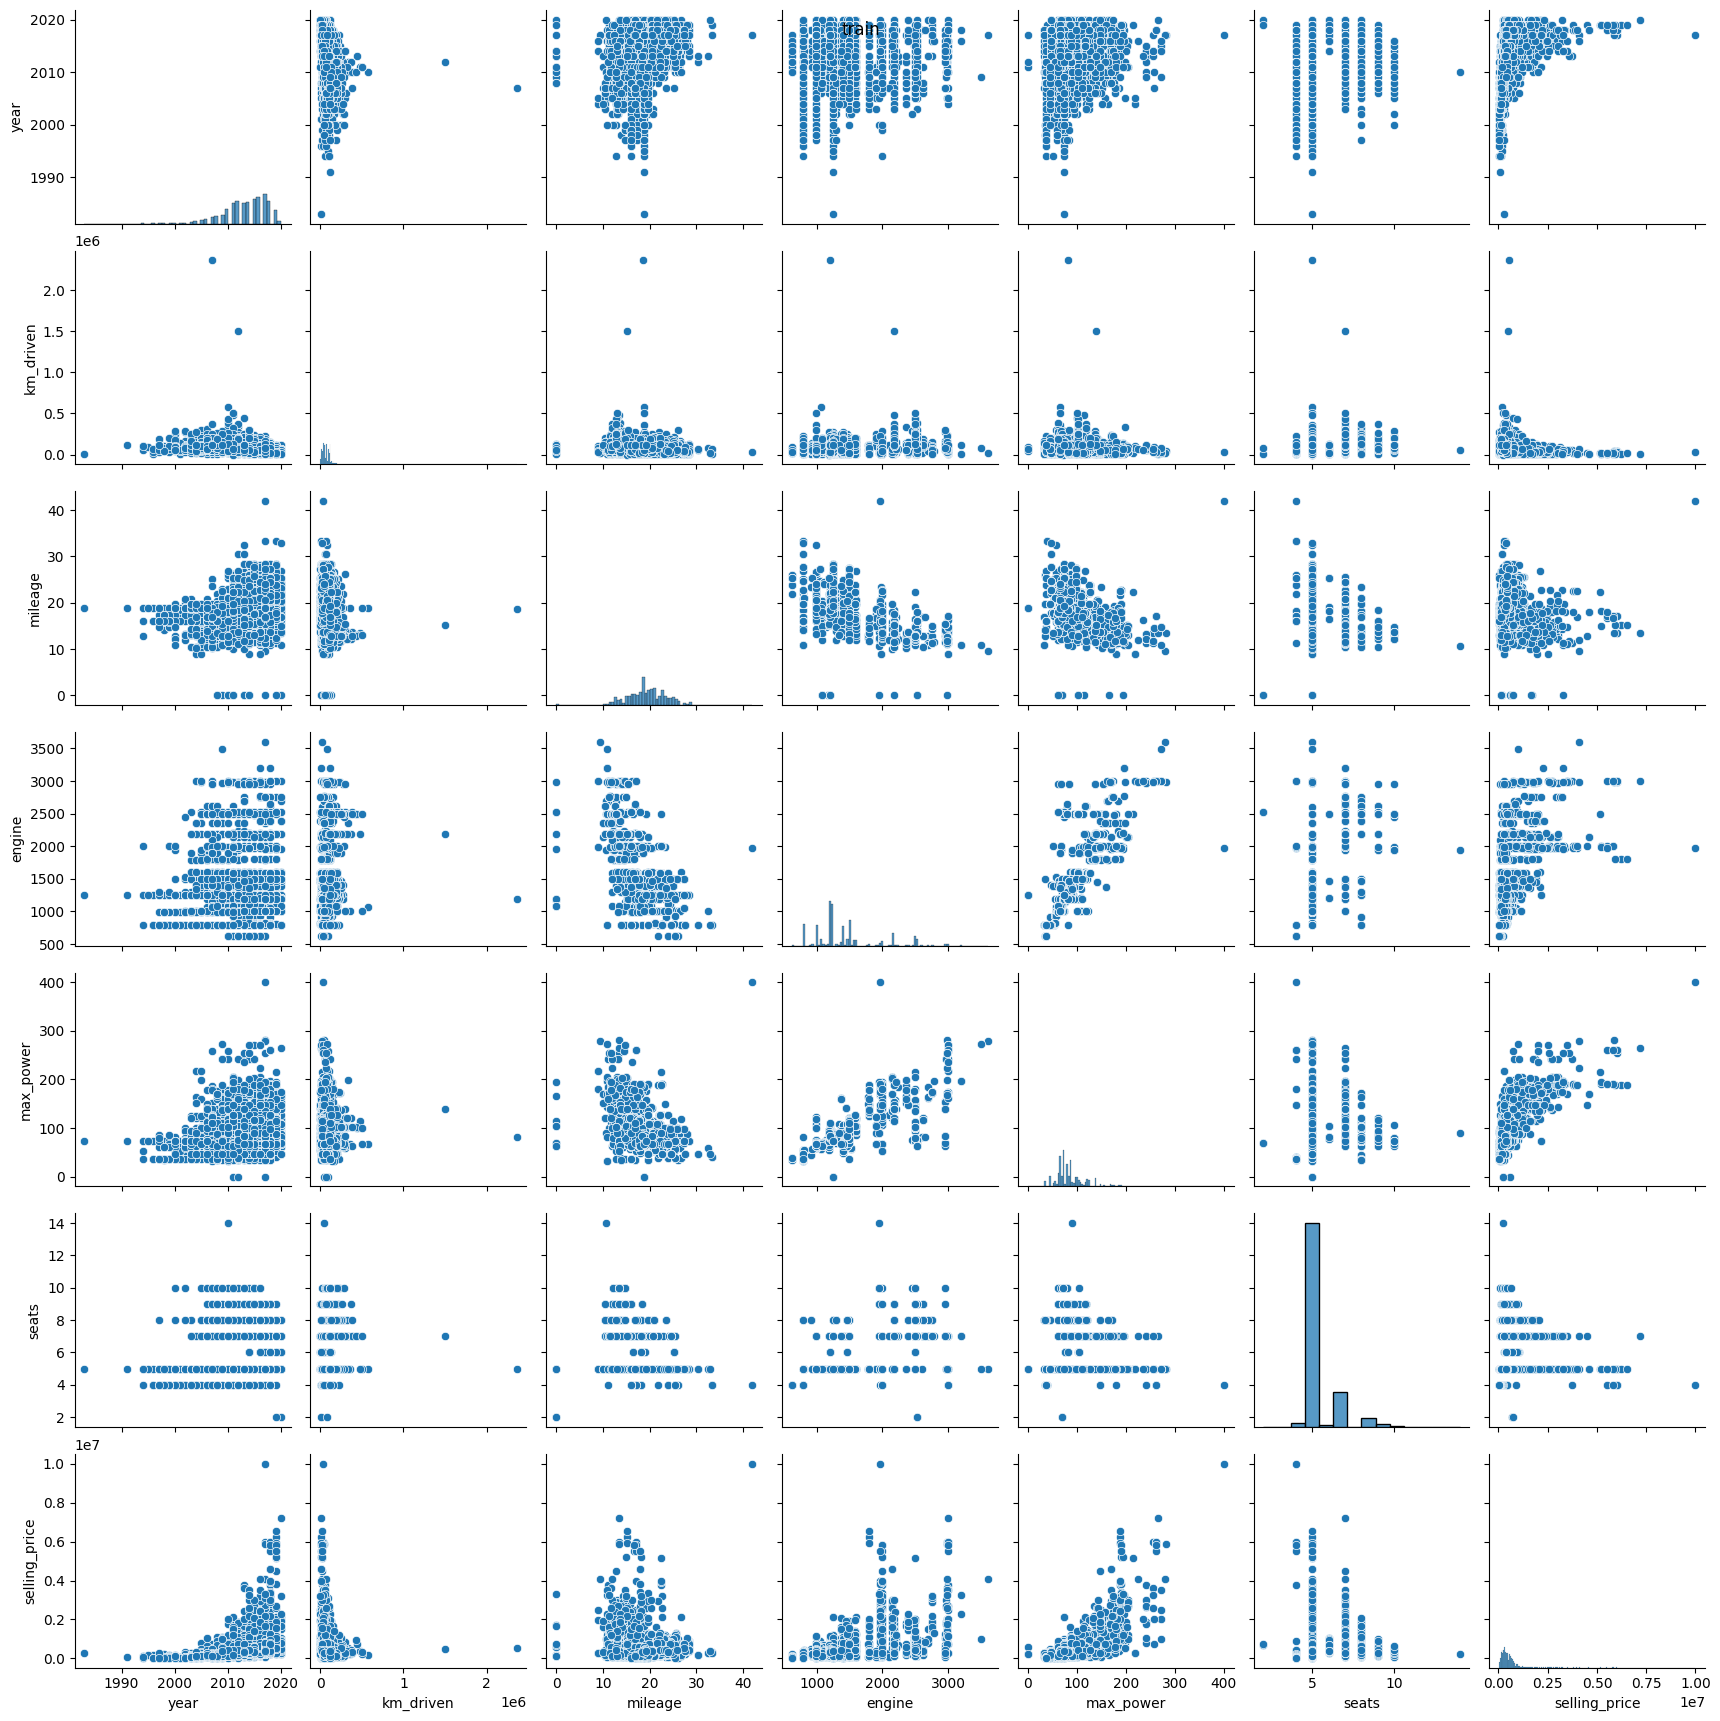

In [ ]:
numeric_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']  #seats можно считать как числовым признаком, так и категориальным. Поэтому по нему тоже строим
sns.pairplot(df_train[numeric_cols])    #строим совместные попарные распределения
plt.suptitle('train')
plt.show()

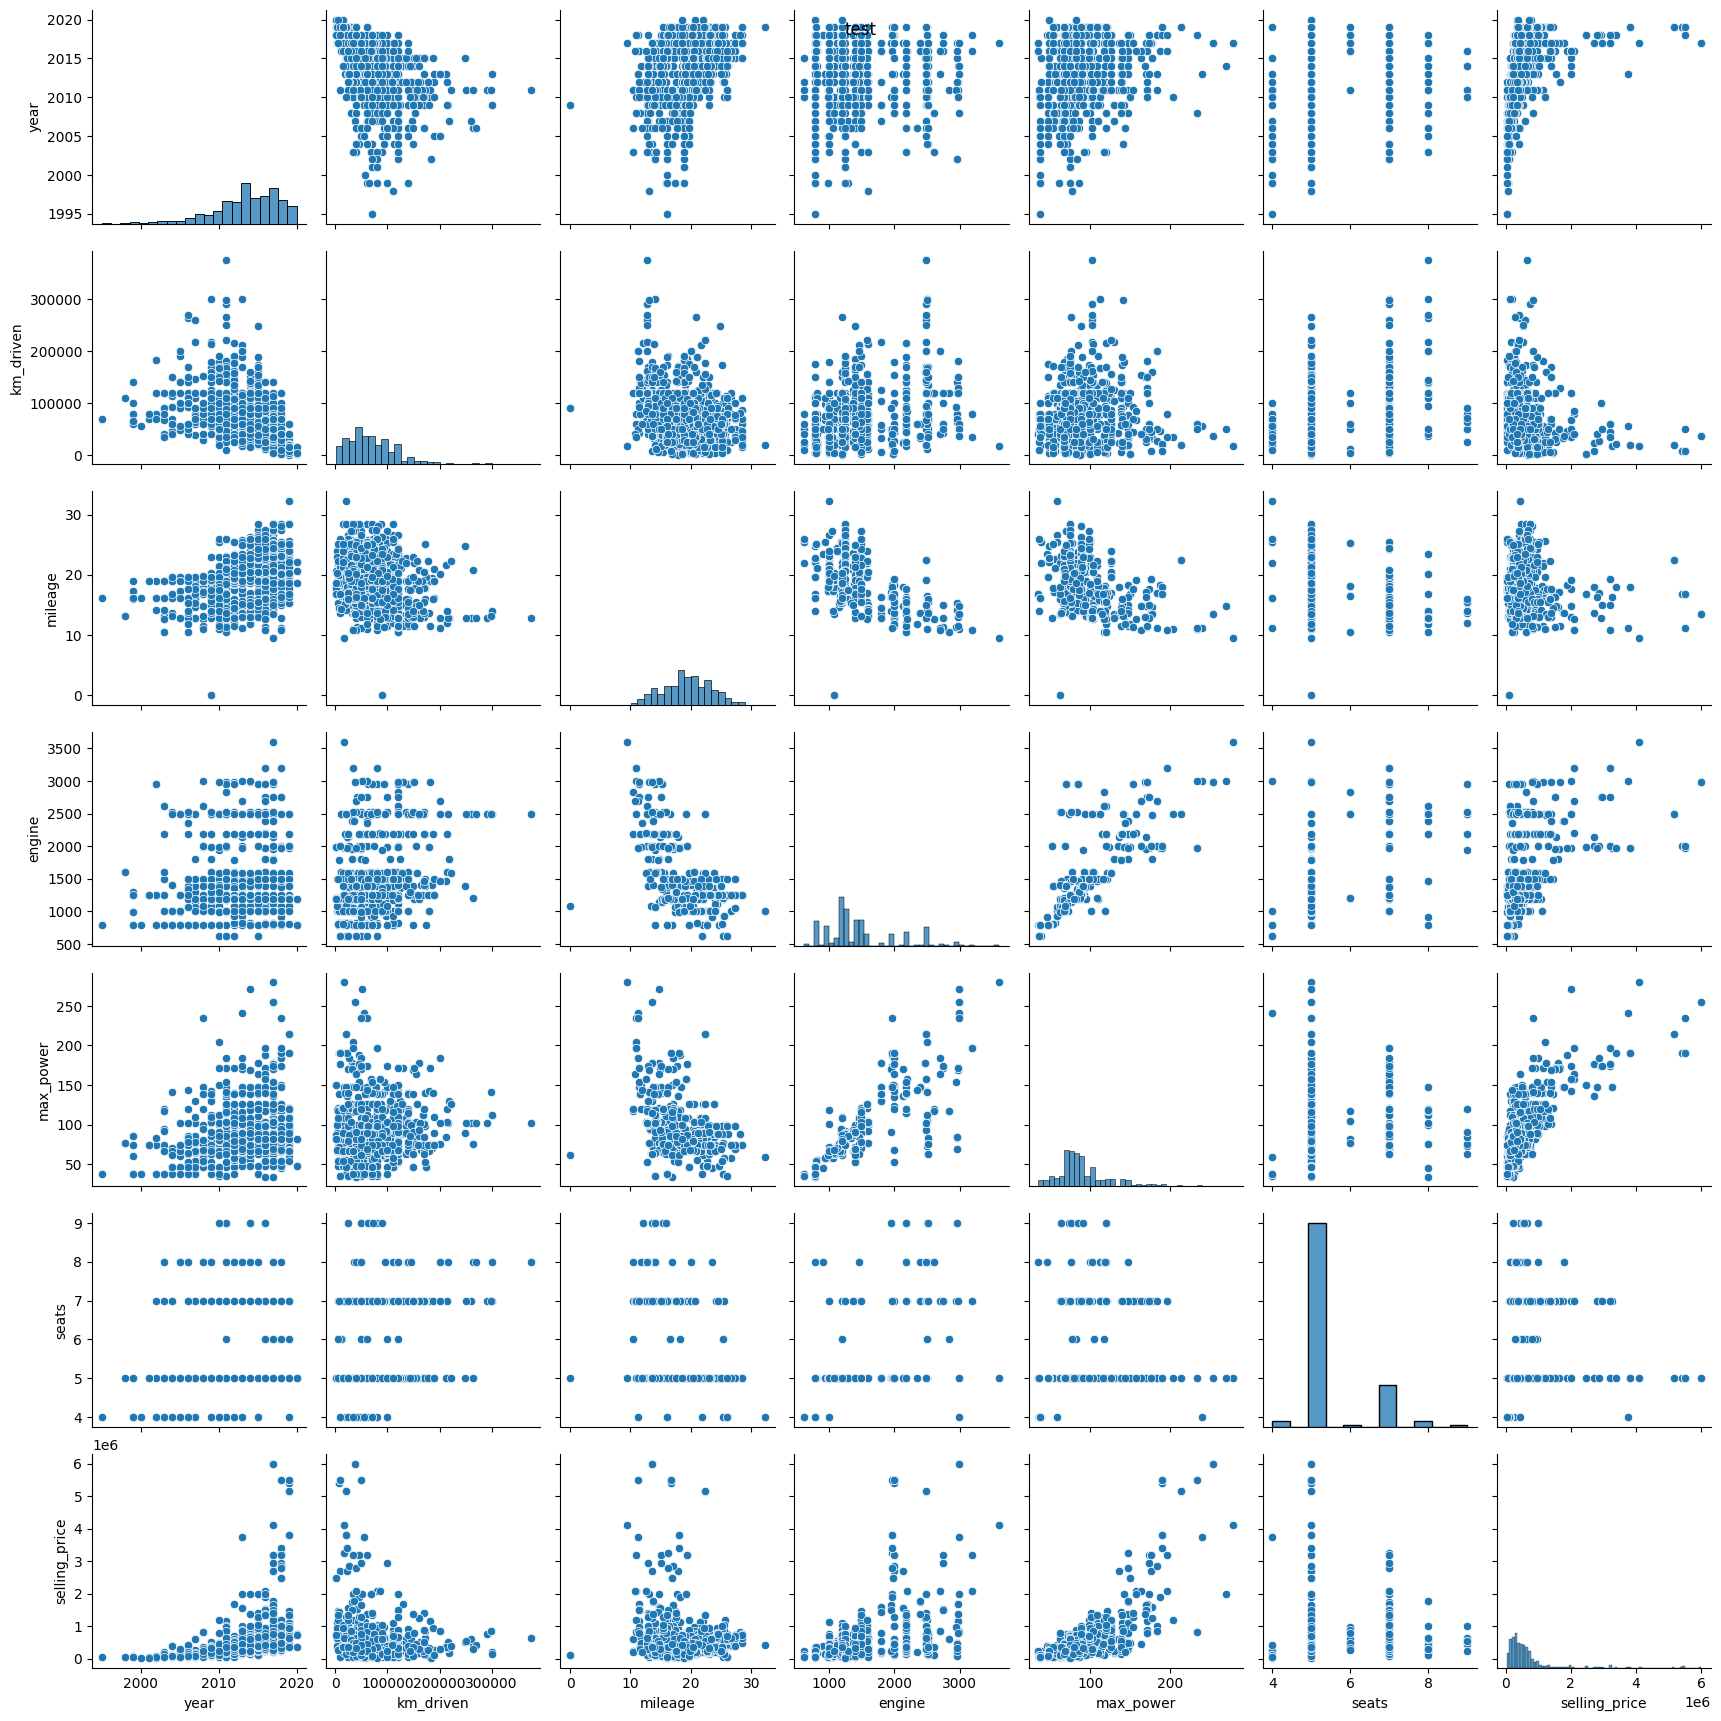

In [ ]:
sns.pairplot(df_test[numeric_cols])
plt.suptitle('test')
plt.show()

1.
Признаки year, max_power, engine - ключевые для прогноза, так как сама заметная корреляция (положительная). Еще есть заметные корреляции сmileage, km_driven, но они отрицательные
Также max_power, engine сильно коррелируют между собой (что логично), так что для обучения можно одну попробовать исключить. Еще km_given и year имеют сильную обратную корреляцию

2.
Видно, что у test очень близкие распределения, если не учитывать выбросы, из за них распределения выглядят различными (в основном в train есть сильные выбросы, что очевидно, так как малое число выбросов с большей вероятностью попадет в train)

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


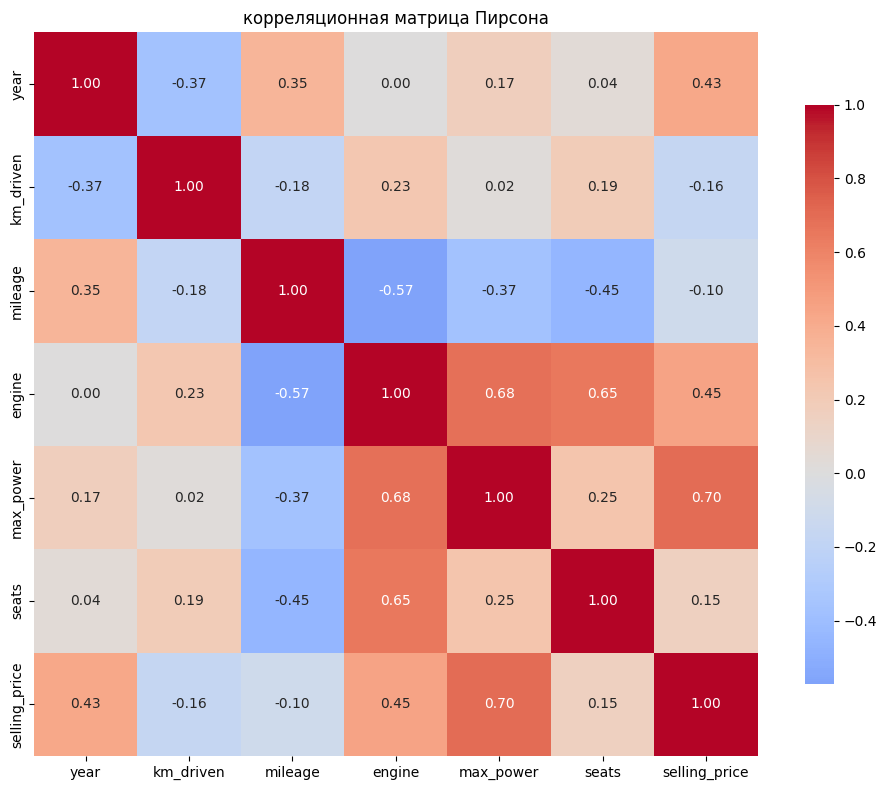

In [ ]:
corr_matrix = df_train[numeric_cols].corr()

#тепловая карта
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            square=True, cbar_kws={'shrink': 0.8})
plt.title('корреляционная матрица Пирсона')
plt.tight_layout()
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Наименее скоррелированные признаки: (year, engine), (max_power, km_driven), (year,seats)
Сильная положительная зависимость: (selling_price,max_power) и (max_power,engine) и (seats, engine)

Корреляция между km_driven и year довольно заметная и отрицательная. Однако, не такая сильная. Можно по распраделению увидеть, что старые машины не обязательно имеют большой пробег (что очевидно, ведь они могут продавать в неотремонитрованном виде, следовательно, давно не эксплуатируются).


### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

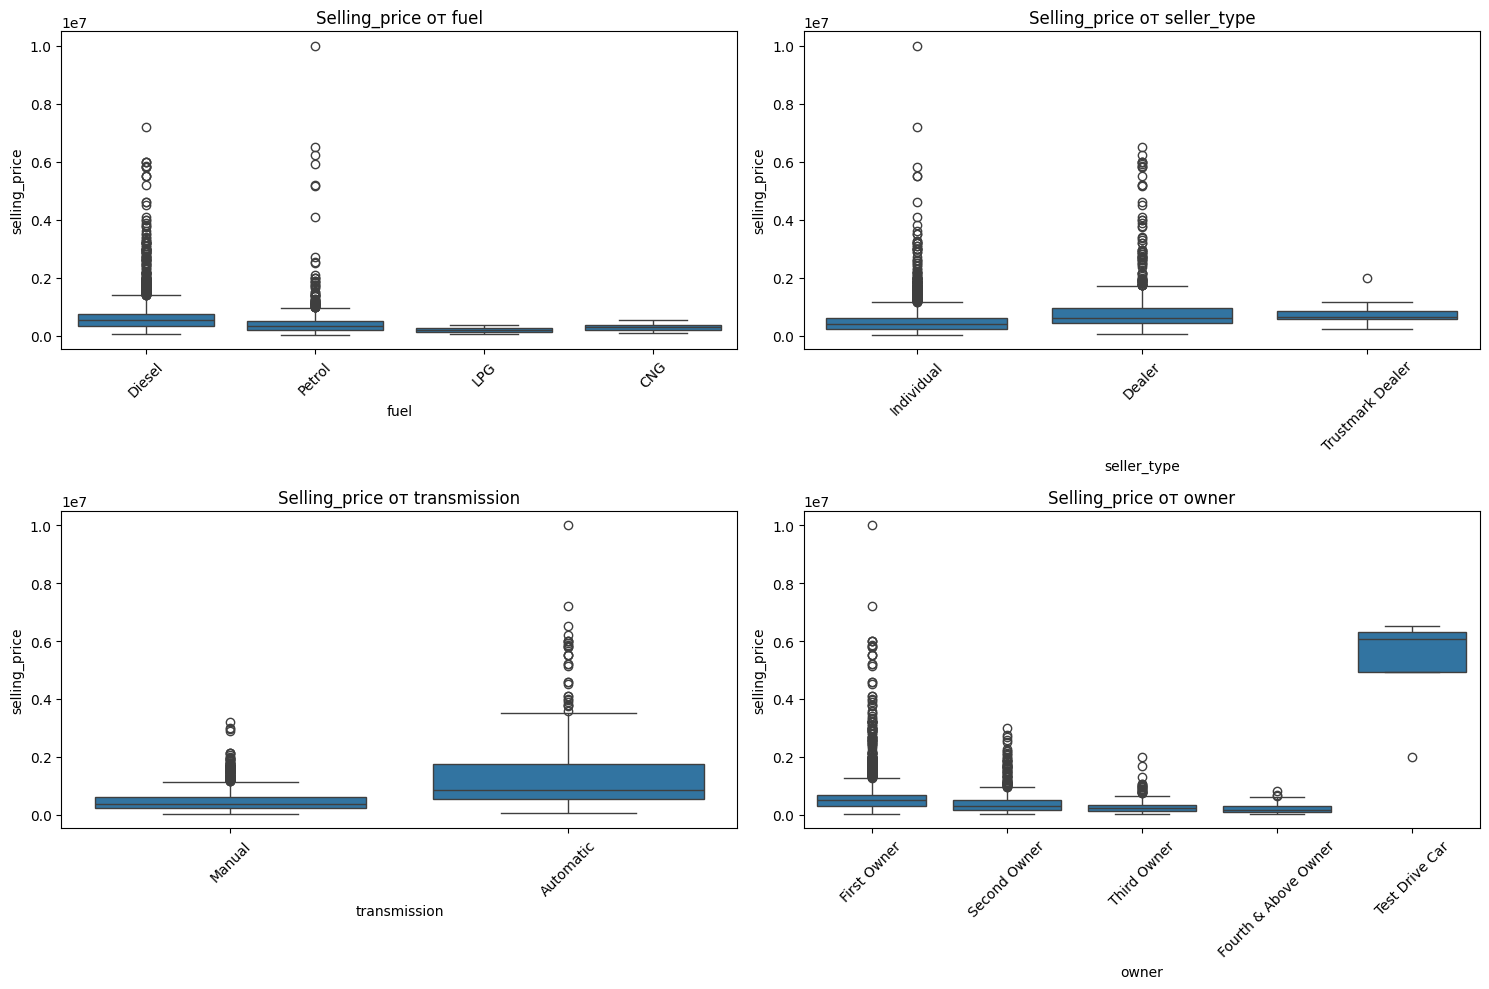

In [ ]:
#вообще не учли категориальные признаки, а в profile report видно, что есть корреляция, например, между трансмиссией и ценой. Исправим это, не создавая OneHot

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(['fuel', 'seller_type', 'transmission', 'owner']):
    sns.boxplot(data=df_train, x=col, y='selling_price', ax=axes[i])
    axes[i].set_title(f'Selling_price от {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
#видно, что автомат сильно дороже. Видно, что число владельцев снижает стоимость (несильная корреляция)

['Maruti' 'Skoda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra' 'Honda'
 'Chevrolet' 'Fiat' 'Datsun' 'Tata' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Isuzu' 'Peugeot']


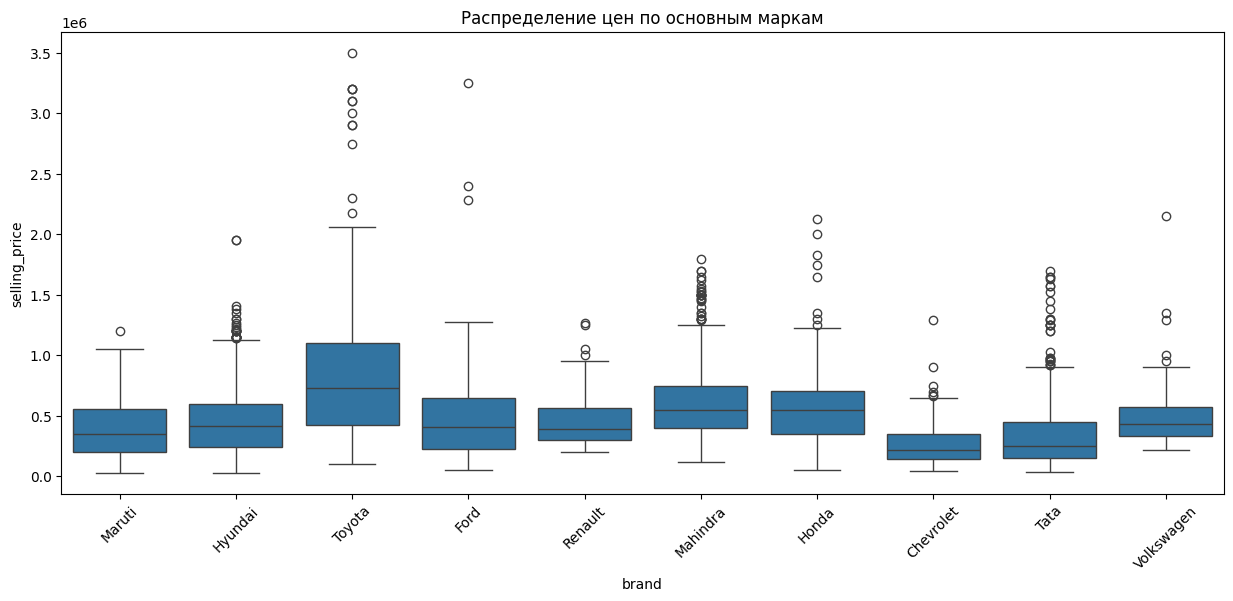

In [ ]:
# еще попробуем посмотреть зависимость цены от марки авто
# Извлекаем марку
df_train_mod = df_train.copy()
df_train_mod['brand'] = df_train['name'].str.split().str[0]
print(df_train_mod['brand'].unique()) #не совсем точный метод, потому что например марка не Land а Land Rover (может есть еще какая-то марка с первым словом Land).
#Но в среднем, большинство марок видно

#посмотрим по основным 10 маркам по популярности
plt.figure(figsize=(15, 6))
top_10_brands = df_train_mod['brand'].value_counts().head(10).index
sns.boxplot(data=df_train_mod[df_train_mod['brand'].isin(top_10_brands)],
            x='brand', y='selling_price')
plt.title('Распределение цен по основным маркам')
plt.xticks(rotation=45)
plt.show()

#видно, в среднем Toyota дороже, а Chevrolet дешевле


# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [ ]:
X_train = df_train[numeric_cols].copy()
y_train = X_train.pop('selling_price')

In [ ]:
X_test = df_test[numeric_cols].copy()
y_test = X_test.pop('selling_price')

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
# обучаем линейную регрессию
lr = LinearRegression()
lr.fit(X_train, y_train)

# предсказания
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

#считаем скоры
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = MSE(y_train, y_train_pred)
test_mse = MSE(y_test, y_test_pred)

print(f"train R2: {train_r2:.4f}")
print(f"test R2:  {test_r2:.4f}")
print(f"train MSE: {train_mse:.2f}")
print(f"test MSE:  {test_mse:.2f}")


train R2: 0.5912
test R2:  0.5935
train MSE: 117191096285.84
test MSE:  233691781105.66


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
# Обучаем стандартизатор на тренировочных данных
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index) #сразу вернем нормальный формат
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns, index=X_test.index)

# Обучаем линейную регрессию на стандартизированных данных
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

# Предсказания
y_train_pred_scaled = lr_scaled.predict(X_train_scaled)
y_test_pred_scaled = lr_scaled.predict(X_test_scaled)

# Метрики
train_r2_scaled = r2_score(y_train, y_train_pred_scaled)
test_r2_scaled = r2_score(y_test, y_test_pred_scaled)

train_mse_scaled = MSE(y_train, y_train_pred_scaled)
test_mse_scaled = MSE(y_test, y_test_pred_scaled)

print(f"train R2: {train_r2_scaled:.4f}")
print(f"test R2:  {test_r2_scaled:.4f}")
print(f"train MSE: {train_mse_scaled:.2f}")
print(f"test MSE:  {test_mse_scaled:.2f}")


train R2: 0.5912
test R2:  0.5935
train MSE: 117191096285.85
test MSE:  233691781105.66


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
# Получаем веса признаков
feature_weights = pd.DataFrame({ 'feature': X_train.columns, 'weight': lr_scaled.coef_, 'abs_weight': np.abs(lr_scaled.coef_)}).sort_values('abs_weight', ascending=False)

# Самый важный признак
most_important = feature_weights.iloc[0]
print(f"самый важный признак: '{most_important['feature']}'") #согласуется с коэффициентами Пирсона
print(feature_weights)

самый важный признак: 'max_power'
     feature         weight     abs_weight
4  max_power  323394.606361  323394.606361
0       year  148348.462269  148348.462269
3     engine   61194.491006   61194.491006
1  km_driven  -44799.741683   44799.741683
2    mileage   29504.194114   29504.194114
5      seats  -23706.951225   23706.951225


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
# Обучаем Lasso регрессию
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

# Предсказания
y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

# Метрики
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"train R2: {train_r2_lasso:.4f}")
print(f"test R2:  {test_r2_lasso:.4f}")


train R2: 0.5912
test R2:  0.5935


In [ ]:
# Анализ весов
lasso_weights = pd.DataFrame({ 'feature': X_train.columns, 'weight': lasso.coef_, 'abs_weight': np.abs(lasso.coef_)}).sort_values('abs_weight', ascending=False)

# Проверяем зануленные веса
zeroed_features = lasso_weights[lasso_weights['weight'] == 0]
if len(zeroed_features) > 0:
    print("зануленные признаки:")
    print(zeroed_features['feature'].tolist())

print(lasso_weights)

     feature         weight     abs_weight
4  max_power  323395.511819  323395.511819
0       year  148348.280242  148348.280242
3     engine   61189.634411   61189.634411
1  km_driven  -44798.609701   44798.609701
2    mileage   29502.311533   29502.311533
5      seats  -23704.063511   23704.063511


Значения alpha по умолчанию не достаточно (там 1), веса огромные, поэтому и не зануляются. Видно по разнице с предыдущим шагом, что коэффициент Лагранжа нужен сильно больший, так как изменились веса менее чем на 1/10000

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
param_grid = { 'alpha': [0.001, 0.01, 0.1, 1 , 10, 100, 300, 1000, 3000, 10000, 30000, 100000]}

lasso_grid = GridSearchCV(Lasso(), param_grid, cv=10)

lasso_grid.fit(X_train_scaled, y_train)

print(f"Лучший alpha: {lasso_grid.best_params_['alpha']}")
print(f"Лучший R2: {lasso_grid.best_score_:.4f}")
print(f"Всего обучено моделей: {10*len(lasso_grid.cv_results_['mean_test_score'])}")

y_test_pred_lasso = lasso_grid.best_estimator_.predict(X_test_scaled)
test_r2__lasso = r2_score(y_test, y_test_pred_lasso)
print(f"R2 на тестовом наборе: {test_r2_lasso:.4f}")

Лучший alpha: 30000
Лучший R2: 0.5736
Всего обучено моделей: 120
R2 на тестовом наборе: 0.5935


In [ ]:
best_lasso = lasso_grid.best_estimator_
lasso_weights = pd.DataFrame({'feature': X_train.columns,'weight': best_lasso.coef_}).sort_values('weight', key=abs, ascending=False)

print("оставшиеся признаки:")
print(lasso_weights[lasso_weights['weight'] != 0])

оставшиеся признаки:
     feature         weight
4  max_power  319084.703615
0       year  139980.506450
1  km_driven  -13693.460284


In [ ]:
#занулились аж три веса

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
param_grid_en = {'alpha': [0.001, 0.01, 0.1, 1 , 10, 100, 300, 1000, 3000, 10000, 30000, 100000],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1]  # смесь L1 и L2 регуляризации
}

en_grid = GridSearchCV(ElasticNet(), param_grid_en, cv=10)

#обучаем
en_grid.fit(X_train_scaled, y_train)

# метрики
print(f"лучшие параметры: {en_grid.best_params_}")
print(f"лучший R2: {en_grid.best_score_:.4f}")
print(f"всего обучено моделей: {10*len(en_grid.cv_results_['mean_test_score'])}")

#почти чистый Lasso получился

y_test_pred_en = en_grid.best_estimator_.predict(X_test_scaled)
test_r2_en = r2_score(y_test, y_test_pred_en)
print(f"R2 на тестовом наборе: {test_r2_en:.4f}")

лучшие параметры: {'alpha': 1, 'l1_ratio': 0.9}
лучший R2: 0.5749
всего обучено моделей: 720
R2 на тестовом наборе: 0.5715


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [ ]:
#смотрим сколько уникальных элементов в name
print("уникальных элементов: ", len(df_train["name"].unique()))


# Удаляем столбец name из тренировочных и тестовых данных
df_train_cat = df_train.drop('name', axis=1)
df_test_cat = df_test.drop('name', axis=1)

X_train_cat = df_train_cat.copy().drop('selling_price', axis=1)
X_test_cat = df_test_cat.copy().drop('selling_price', axis=1)

уникальных элементов:  1924


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [ ]:
#assert X_train_cat.shape == (5840, 10)

In [ ]:
#выше уже проделано, получили df_train_mod в визуализациях. Теперь у нас используются марки
#повторим для test
df_test_mod = df_test.copy()
df_test_mod['brand'] = df_test['name'].str.split().str[0]

#name надо удалить
df_train_mod = df_train_mod.drop('name', axis=1)
df_test_mod = df_test_mod.drop('name', axis=1)

X_train_mod = df_train_mod.copy().drop('selling_price', axis=1)
X_test_mod = df_test_mod.copy().drop('selling_price', axis=1)

In [ ]:
# находим неизвестные категории в тесте
cat_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats', 'brand']

for i, col in enumerate(cat_features):
    train_cats = set(X_train_mod[col].unique())
    test_cats = set(X_test_mod[col].unique())
    unknown = test_cats - train_cats
    if unknown:
        print(f"неизвестные в {col}: {unknown}")
        # заменяем неизвестные на самую частую категорию из train, это нужно для OHE
        most_frequent = X_train_mod[col].mode()[0]
        X_test_mod[col] = X_test_mod[col].replace(list(unknown), most_frequent)

неизвестные в brand: {'Ashok', 'Opel'}


In [ ]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner
count     5840        5840         5840         5840
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      3177        5223         5336         3603

In [ ]:
X_train_mod.describe(include='object')

fuel seller_type transmission        owner   brand
count     5840        5840         5840         5840    5840
unique       4           3            2            5      30
top     Diesel  Individual       Manual  First Owner  Maruti
freq      3177        5223         5336         3603    1804

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
#работаем с name
# onehot для категориальных признаков
ohe = OneHotEncoder(drop='first', sparse_output=False)

x_train_ohe = ohe.fit_transform(X_train_mod[cat_features])
x_test_ohe = ohe.transform(X_test_mod[cat_features])

# переписываем столбцы
ohe_columns = ohe.get_feature_names_out(cat_features)
X_train_ohe_name = pd.DataFrame(x_train_ohe, columns=ohe_columns, index=X_train_mod.index)
X_test_ohe_name = pd.DataFrame(x_test_ohe, columns=ohe_columns, index=X_test_mod.index)

#вкладываем числовые признаки
numeric_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power']
X_train_ohe_name = pd.concat([X_train_scaled[numeric_features], X_train_ohe_name], axis=1)

X_test_ohe_name = pd.concat([X_test_scaled[numeric_features],X_test_ohe_name], axis=1)


In [ ]:
#работаем без name
# onehot для категориальных признаков
cat_features_ = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
ohe = OneHotEncoder(drop='first', sparse_output=False)

x_train_ohe_cat = ohe.fit_transform(X_train_cat[cat_features_])
x_test_ohe_cat = ohe.transform(X_test_cat[cat_features_])

# переписываем столбцы
ohe_columns_cat = ohe.get_feature_names_out(cat_features_)
X_train_ohe_cat = pd.DataFrame(x_train_ohe_cat, columns=ohe_columns_cat, index=X_train_cat.index)
X_test_ohe_cat = pd.DataFrame(x_test_ohe_cat, columns=ohe_columns_cat, index=X_test_cat.index)

#вкладываем числовые признаки
X_train_ohe_cat = pd.concat([X_train_scaled[numeric_features], X_train_ohe_cat], axis=1)
X_test_ohe_cat = pd.concat([X_test_scaled[numeric_features],X_test_ohe_cat], axis=1)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
#для версии с name
param_grid = {'alpha': [0.001, 0.01, 0.1, 1 , 10, 100, 300, 1000, 3000, 10000, 30000, 100000]}

# gridsearch с кросс-валидацией
ridge_grid_name = GridSearchCV(Ridge(), param_grid, cv=10, scoring='r2')
ridge_grid_name.fit(X_train_ohe_name, y_train)

# лучшая модель
best_ridge_name = ridge_grid_name.best_estimator_
y_pred_ridge_name = best_ridge_name.predict(X_test_ohe_name)
r2_ridge_name = r2_score(y_test, y_pred_ridge_name)

print(f"лучший alpha: {ridge_grid_name.best_params_}")
print(f"лучший R2 на CV: {ridge_grid_name.best_score_:.4f}")
print(f"R2 на тесте: {r2_ridge_name:.4f}")

# сравнение с предыдущими моделями
print(f"\nсравнение с elasticnet ({test_r2_en:.4f}): улучшение = {r2_ridge_name - test_r2_en:.4f}")

лучший alpha: {'alpha': 1}
лучший R2 на CV: 0.7096
R2 на тесте: 0.7807

сравнение с elasticnet (0.5715): улучшение = 0.2092


Удалось улучшить значительно

In [ ]:
#для версии без name
param_grid = {'alpha': [0.001, 0.01, 0.1, 1 , 10, 100, 300, 1000, 3000, 10000, 30000, 100000]}

# gridsearch с кросс-валидацией
ridge_grid_cat = GridSearchCV(Ridge(), param_grid, cv=10, scoring='r2')
ridge_grid_cat.fit(X_train_ohe_cat, y_train)

# лучшая модель
best_ridge_cat = ridge_grid_cat.best_estimator_
y_pred_ridge_cat = best_ridge_cat.predict(X_test_ohe_cat)
r2_ridge_cat = r2_score(y_test, y_pred_ridge_cat)

print(f"лучший alpha: {ridge_grid_cat.best_params_}")
print(f"лучший R2 на CV: {ridge_grid_cat.best_score_:.4f}")
print(f"R2 на тесте: {r2_ridge_cat:.4f}")

# сравнение с предыдущими моделями
print(f"\nсравнение с elasticnet ({test_r2_en:.4f}): улучшение = {r2_ridge_cat - test_r2_en:.4f}")

лучший alpha: {'alpha': 10}
лучший R2 на CV: 0.6204
R2 на тесте: 0.6447

сравнение с elasticnet (0.5715): улучшение = 0.0733


Удалось улучшить, но вариант с наличием марки дает результат кратно лучше. Что говорит нам о том, что оставить name было правильным решением

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [ ]:
def business_metric(y_true, y_pred):
    errors = np.abs(y_true - y_pred) / y_true
    within_10_percent = np.sum(errors <= 0.1) / len(y_true)
    return within_10_percent

# считаем метрику для всех моделей
models = {
    'linear_regression': (y_test, y_test_pred),
    'linear_regression_scaled': (y_test, y_test_pred_scaled),
    'lasso': (y_test, y_test_pred_lasso),
    'elasticnet': (y_test, y_test_pred_en),
    'ridge_grid_name': (y_test, y_pred_ridge_name),
    'ridge_grid_cat': (y_test, y_pred_ridge_cat)
}

best_model = None
best_score = 0

for name, (y_true, y_pred) in models.items():
    score = business_metric(y_true, y_pred)
    print(f"{name}: {score:.4f} ({score*100:.1f}%)")

    if score > best_score:
        best_score = score
        best_model = name

print(f"лучшая модель: {best_model} ")


linear_regression: 0.2210 (22.1%)
linear_regression_scaled: 0.2210 (22.1%)
lasso: 0.2230 (22.3%)
elasticnet: 0.2410 (24.1%)
ridge_grid_name: 0.3110 (31.1%)
ridge_grid_cat: 0.2440 (24.4%)
лучшая модель: ridge_grid_name 


Лучше всех работает ridge, причем добавление признака марки улучшает результат на 7 процентов. Так что даже несмотря на сильный рост размерности, модель успешно обучается на таком объеме данных.

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.

# Собираем пайплайн

## Старая версия

In [ ]:
#сохраняем pipeline: заполнение пропусков медианой или модой, обработка признаков (чистка форматов и создание brand),Scalar,OHE, ridge
best_model = ridge_grid_name

def preprocess_data(df,reference_df = None):
    """Вся предобработка, которую мы использовали: чистка единиц, удаление torque, создание brand"""
    df = df.copy()

    # Чистка от единиц
    columns_to_clean = ['mileage', 'engine', 'max_power']
    for column in columns_to_clean:
        df[column] = df[column].astype(str).str.replace(r'[^\d\.]+', '', regex=True)
        df[column] = pd.to_numeric(df[column], errors='coerce').astype('float64')

    # удаление torque
    if 'torque' in df.columns:
        df = df.drop('torque', axis=1)

    # brand из name
    if 'name' in df.columns:
        df['brand'] = df['name'].str.split().str[0]
        df = df.drop('name', axis=1)
        col = "brand"
        if reference_df is not None:
                    train_cats = set(reference_df[col].unique())
                    test_cats = set(df[col].unique())
                    unknown = test_cats - train_cats
                    if unknown:
                        most_frequent = reference_df[col].mode()[0]
                        df[col] = df[col].replace(list(unknown), most_frequent)

    return df

final_pipeline = Pipeline([
    ('cleaner', FunctionTransformer(preprocess_data)),

    # ColumnTransformer для чсловых и категориальных отдельно
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', scaler)
        ]), ['year', 'km_driven', 'mileage', 'engine', 'max_power']),

        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ohe', ohe)
        ]), ['fuel', 'seller_type', 'seats', 'transmission', 'owner', 'brand'])
    ])),

    ('model', best_model)  # лучшая модель
])
# Нужно обучить на данных
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')
X_train_raw = df_train.copy()
y_train_raw = X_train_raw.pop('selling_price')
X_test_raw = df_test.copy()
y_test_raw = X_test_raw.pop('selling_price')


X_train_cleaned = preprocess_data(X_train_raw)
final_pipeline.fit(X_train_raw, y_train_raw)

# Сохраняем
with open('final_pipeline.pkl', 'wb') as f:
    pickle.dump(final_pipeline, f)

#тестируем загрузку
with open('final_pipeline.pkl', 'rb') as f:
    loaded = pickle.load(f)
#на диск в ручном режиме гружу, чтобы Вам при прогоне этого ноутбука не добавлялся лишний файл на drive

In [ ]:
# Загружаем сохраненный пайплайн
with open('final_pipeline.pkl', 'rb') as f:
    pipeline = pickle.load(f)

X_train_processed = preprocess_data(X_train_raw)
X_test_processed = preprocess_data(X_test_raw, reference_df=X_train_processed)
# Делаем предсказания на тесте
y_pred_pipeline = pipeline.predict(X_test_processed)

pipeline_score = business_metric(y_test, y_pred_pipeline)

print(f"Доля прогнозов в пределах 10%: {pipeline_score:.4f} ({pipeline_score*100:.1f}%)")

Доля прогнозов в пределах 10%: 0.3080 (30.8%)


#Нормальная версия
Пришлось переписать Pipeline в связи с несоместимыми версиями sklearn

In [ ]:
def clean_numeric(df):
    df = df.copy()
    for col in ['mileage', 'engine', 'max_power']:
        df[col] = (df[col]
                  .astype(str)
                  .str.replace(r'[^\d\.]+', '', regex=True)
                  .replace('', np.nan)
                  .astype(float))
    return df

def preprocess_data(df):
    # Предобработка
    df = df.drop(columns=['torque'], errors='ignore')
    df = clean_numeric(df)
    df['brand'] = df['name'].str.split().str[0]
    df = df.drop(columns=['name'])
    return df

#  данные
train_url = "https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv"
test_url = "https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv"

df_train = pd.read_csv(train_url)
df_test = pd.read_csv(test_url)

# X и y
X_train_raw = df_train.drop('selling_price', axis=1)
y_train = df_train['selling_price']
X_test_raw = df_test.drop('selling_price', axis=1)
y_test = df_test['selling_price']

X_train = preprocess_data(X_train_raw)
X_test = preprocess_data(X_test_raw)

# сохраняем все что может пригодиться
data_to_save = {
    'X_train': X_train,
    'y_train': y_train,
    'X_test': X_test,
    'y_test': y_test,
    'feature_names': list(X_train.columns),
    'brand_mapping': X_train['brand'].value_counts().to_dict(),
    'categorical_features': ['fuel', 'seller_type', 'seats', 'transmission', 'owner', 'brand'],
    'numeric_features': ['year', 'km_driven', 'mileage', 'engine', 'max_power']
}

with open('preprocessed_data.pkl', 'wb') as f:
    pickle.dump(data_to_save, f)
#
#from google.colab import files
#files.download('preprocessed_data.pkl')

In [ ]:
data = data_to_save

X_train = data['X_train']
y_train = data['y_train']
numeric_features = data['numeric_features']
categorical_features = data['categorical_features']

# Только трансформеры
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
])

best_model = ridge_grid_name
model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_model)
])

model.fit(X_train, y_train)

with open('simple_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Скачать
#from google.colab import files
#files.download('simple_model.pkl')